# Object Detection

## Exploratory Data Analysis

In [40]:
import os
import random
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [65]:
IMAGES_PATH = '/home/app/src/data/SKU-110K_fixed/images/'
COLUMNS = ['name','xi','yi','xf','yf','label','w','h']

### Load dataset

In [79]:
annotations_train = pd.read_csv('../data/SKU-110K_fixed/annotations/annotations_train.csv', header=None)
annotations_train.columns = COLUMNS
images_list_train = annotations_train['name'].unique().tolist()

annotations_test  = pd.read_csv('../data/SKU-110K_fixed/annotations/annotations_test.csv', header=None)
annotations_test.columns  = COLUMNS
images_list_test  = annotations_test['name'].unique().tolist()

annotations_val   = pd.read_csv('../data/SKU-110K_fixed/annotations/annotations_val.csv', header=None)
annotations_val.columns   = COLUMNS
images_list_val   = annotations_val['name'].unique().tolist()


In [67]:
annotations_train[annotations_train['name']==annotations_train['name'][0]]

,name,xi,yi,xf,yf,label,w,h
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024
...,...,...,...,...,...,...,...,...
136,train_0.jpg,2233,95,2348,288,object,3024,3024
137,train_0.jpg,1896,87,2013,272,object,3024,3024
138,train_0.jpg,2013,83,2142,273,object,3024,3024
139,train_0.jpg,2142,95,2233,288,object,3024,3024


Image: train_0.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (3024, 3024, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


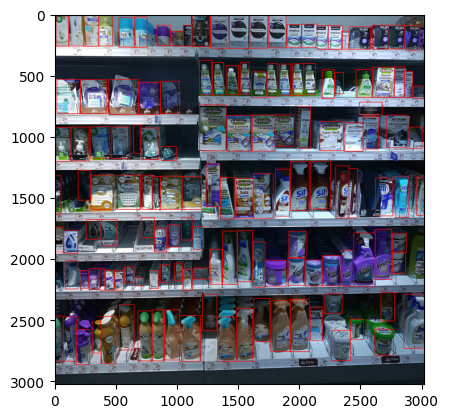

In [76]:
def display_annotated_image(image_name=images_list_train[0], anotation_df=annotations_train, images_path=IMAGES_PATH):
  img_path = os.path.join(images_path, image_name)
  img = cv2.imread(img_path)
  print(f'Image: {image_name}')
  print(f'Image type: {type(img)}')
  print(f'Image shape: {img.shape} (Height x Width x Channels)')
  print(f'Image min value: {img.min()}')
  print(f'Image max value: {img.max()}')
  for bbox in anotation_df[anotation_df['name']==image_name][['xi', 'yi', 'xf', 'yf']].to_numpy().tolist():
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]),
              (255, 0, 0), 3)
  plt.imshow(img)
  plt.show()
  return None
display_annotated_image()

Image: train_4094.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


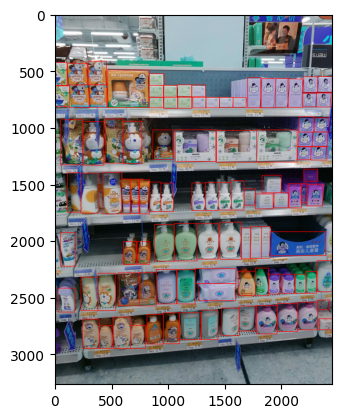

Image: train_2900.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


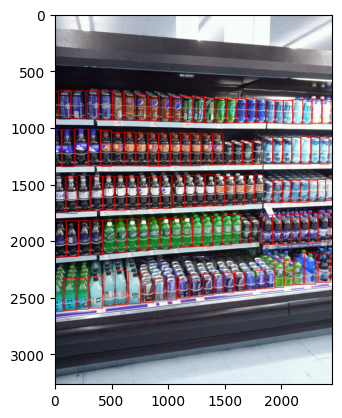

Image: train_2589.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (2560, 1920, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


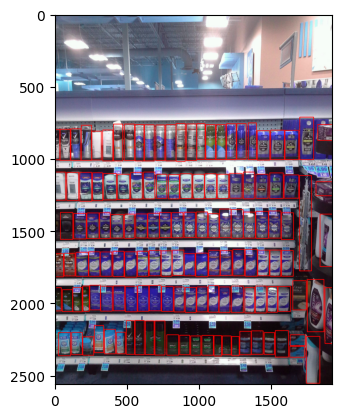

Image: train_2519.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


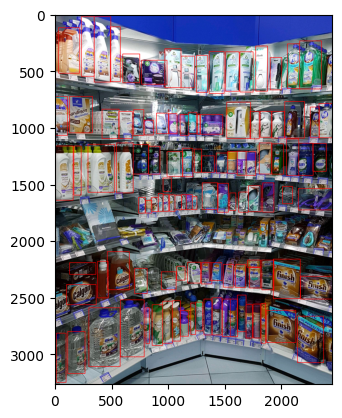

Image: train_4413.jpg
Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


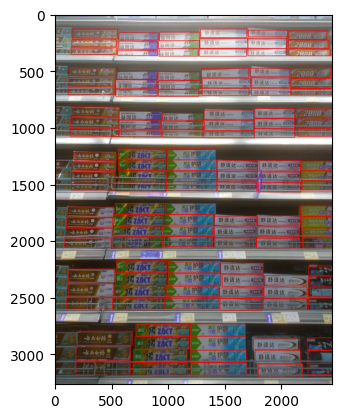

In [78]:
for image_name in random.sample(images_list_train, k = 5):
  display_annotated_image(image_name)